In [145]:
#사용할 패키지들 임포트
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#먼저 사용할 파일들을 먼저 가져오기.

total = pd.read_csv('Data/Output_Data/서울시_상권분석서비스_total_2019to2024_cp949.csv', encoding = 'cp949')
consump = pd.read_csv('Data/Output_Data/New서울시 상권분석서비스.csv', encoding = 'cp949')
#한글패치
plt.rcParams.update({'font.family':'Malgun Gothic'})
#팔레트 색상 지정
colors = sns.color_palette('rocket_r', 15)


지출 컬럼명을 입력하세요 (예: '음식지출금액'):  음식지출금액


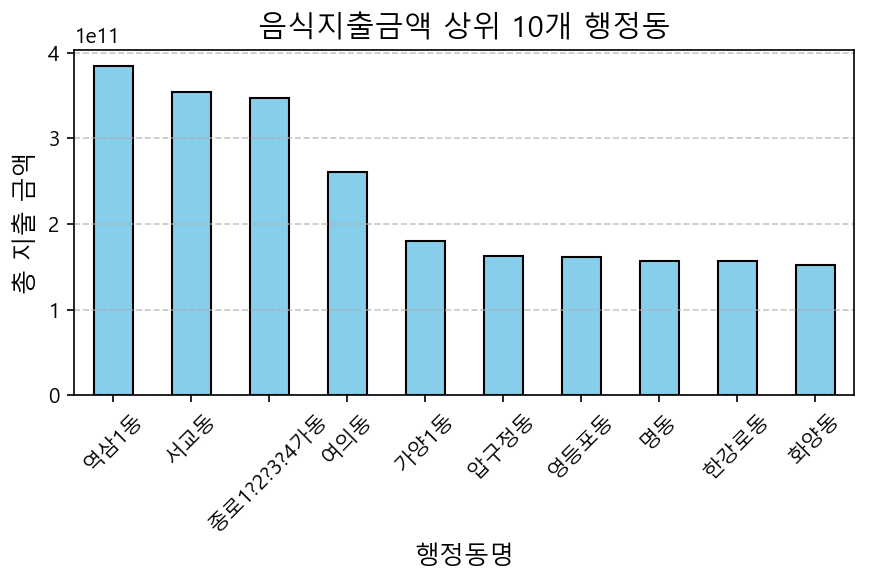

In [149]:
# 사용자 입력창 형태로 만듦
uesr_consump = input("지출 컬럼명을 입력하세요 (예: '음식지출금액'): ")

# 해당 지출 컬럼의 상위 10개 행정동 추출
top_10_dongs = consump.groupby('행정동명')[uesr_consump].sum()\
.sort_values(ascending=False).head(10)

# 바 차트 생성
plt.figure(figsize=(6, 4))
top_10_dongs.plot(kind='bar', color='skyblue', edgecolor='black')

# 그래프 설정
plt.title(f"{uesr_consump} 상위 10개 행정동", fontsize=14)
plt.xlabel("행정동명", fontsize=12)
plt.ylabel("총 지출 금액", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 그래프 출력
plt.show()


행정동명을 입력하세요:  서교동


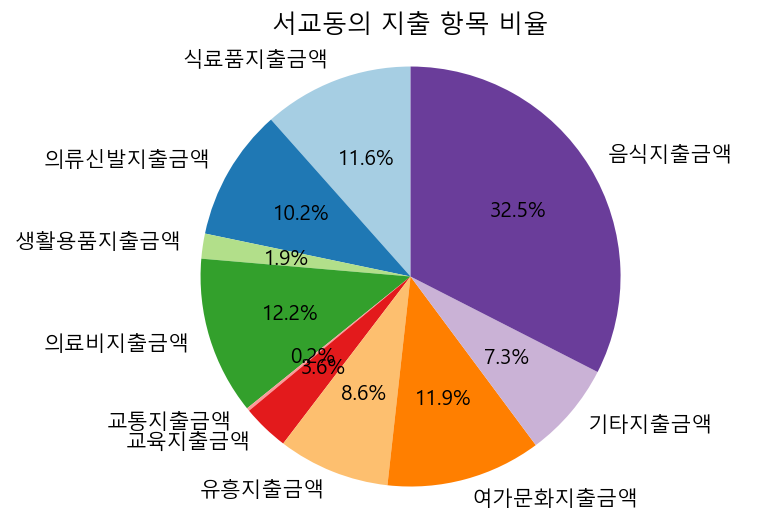

In [154]:
import matplotlib.pyplot as plt

# 사용자 입력
dong_name = input("행정동명을 입력하세요: ")

# 지출 컬럼 리스트
uesr_consumps = [
    '식료품지출금액', '의류신발지출금액', '생활용품지출금액', '의료비지출금액', '교통지출금액', 
    '교육지출금액', '유흥지출금액', '여가문화지출금액', '기타지출금액', '음식지출금액'
]

# 데이터 필터링
filtered_data = consump.query('행정동명 == @dong_name')

# 컬럼별 합계 계산
expenditure_sum = filtered_data[uesr_consumps].sum()

# 파이차트 데이터 준비
labels = expenditure_sum.index
sizes = expenditure_sum.values

# 파이차트 생성
plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title(f"{dong_name}의 지출 항목 비율")
plt.axis('equal')  # 원형 그래프 유지
plt.show()

본인이 찾고싶은 행정동의 이름을 타이핑 하시오. 서교동


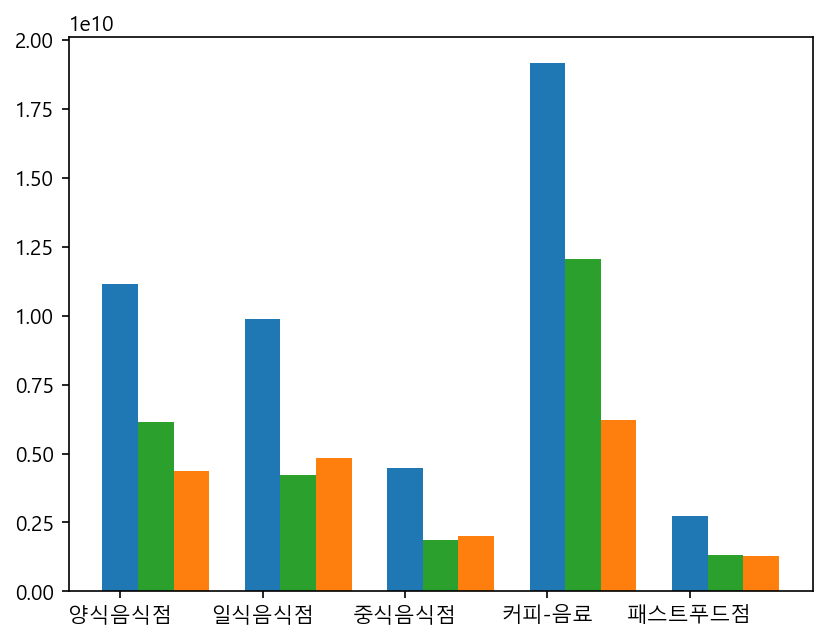

In [155]:
#우리동네의 수치를 확인하기 위해서 세곡동만을 추출하고 업종명으로 그룹화시켜 필요한 데이터만 찾아오기.
# 분기_년을 전부 합친다음 1분기의 평균값으로 만들어 변수에 추가
dong_name = input("본인이 찾고싶은 행정동의 이름을 타이핑 하시오.")

segok = total.query('행정동명==@dong_name') 
segok = segok.groupby('업종명',as_index=False)[['당월매출','남성매출', '여성매출',
                                           '월요일매출', '화요일매출', '수요일매출', '목요일매출',
                                           '금요일매출', '토요일매출', '일요일매출' ,
                                           '10대_매출금액', '20대_매출금액', '30대_매출금액', '40대_매출금액',
                                           '50대_매출금액', '60대_매출금액']].mean()
#세곡동의 당월 매출과 매출을  여성과 남성의 평균낸 후 비율로 확인하기.
import numpy as np
pos = np.arange(len(segok['업종명']))
plt.xticks(pos, segok['업종명'])
plt.bar(pos, segok['당월매출'], label = '당월매출', width = 0.25)
plt.bar(pos+0.5,segok['남성매출'], label = '남성매출', width = 0.25)
plt.bar(pos+0.25,segok['여성매출'], label = '여성매출', width = 0.25)
plt.show()

행정동명을 입력하세요:  서교동


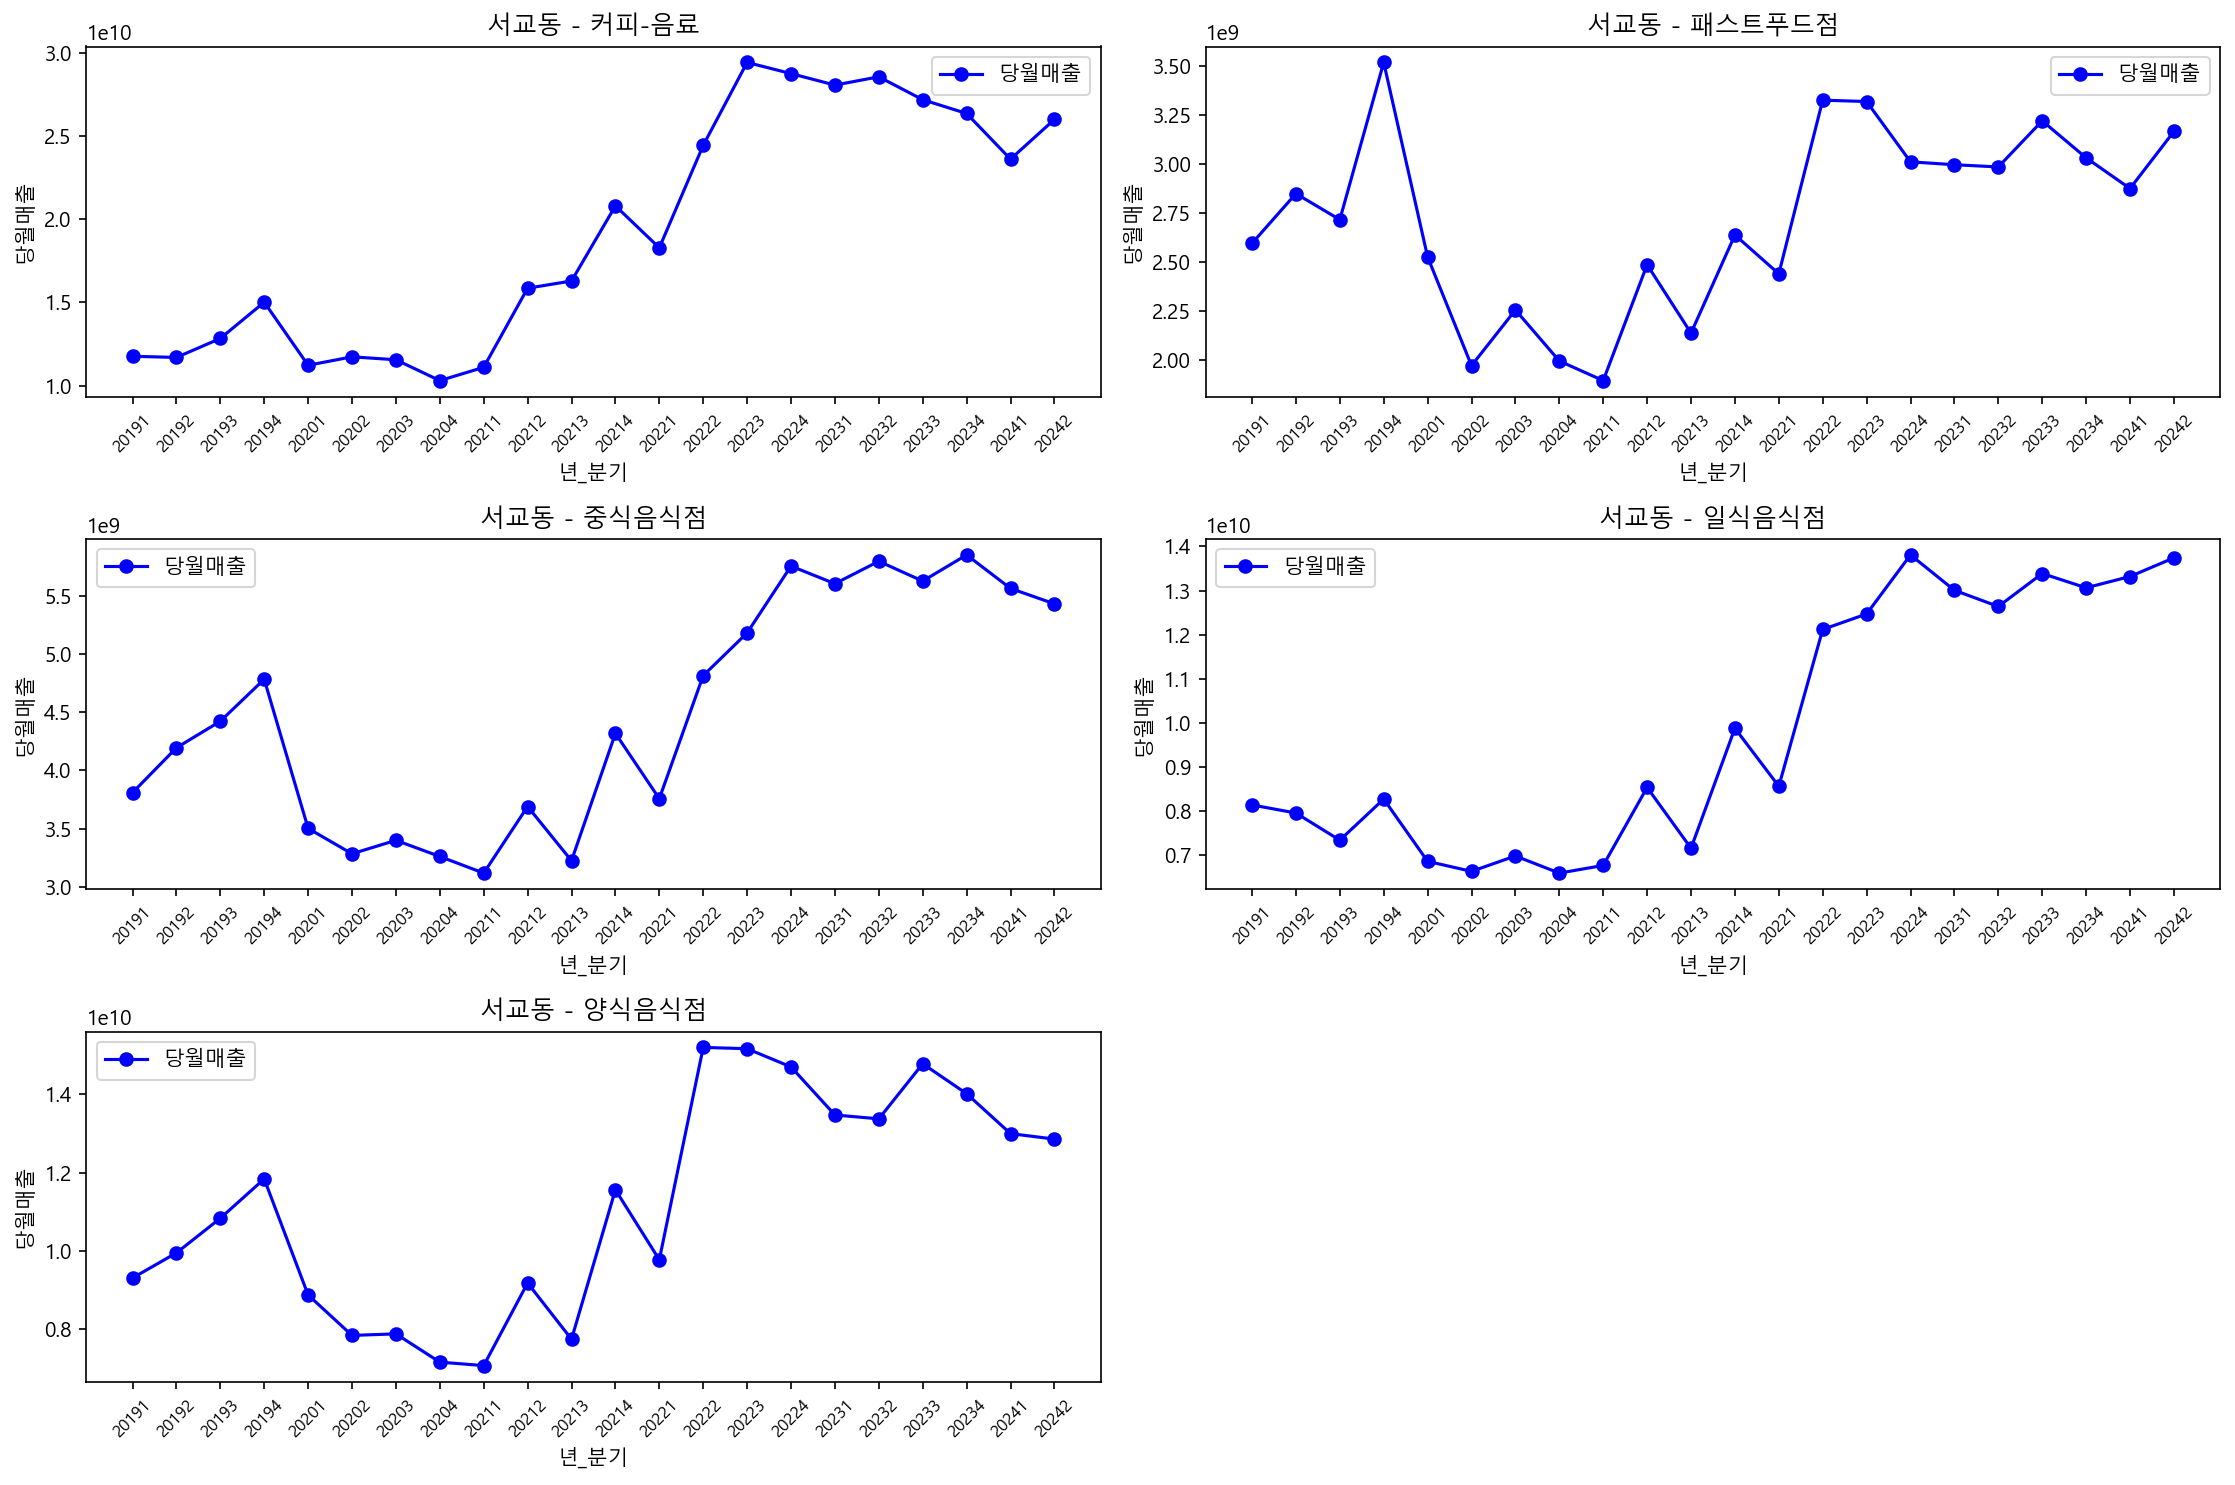

In [156]:
#행정동을 입력해서 업종의 성장률을 분기별로 확인하는 그래프를 그렸습니ㅏㄷ..
import pandas as pd
import matplotlib.pyplot as plt

# input값으로 받아올 수 있게 했습니다.
dong_name = input("행정동명을 입력하세요: ")

# 데이터 추출후 저장
filtered_data = total.query('행정동명 == @dong_name')

# "년_분기",'업종명' 기준으로 데이터를 그룹화하여 "당월매출" 합계 계산      
grouped_data = filtered_data.groupby(['년_분기', '업종명'])['당월매출'].sum().reset_index()

sales_name = ["커피-음료","패스트푸드점","중식음식점","일식음식점","양식음식점"]

plt.figure(figsize=(15, 10))
for i, sales in enumerate(sales_name):
    sales_data = grouped_data[grouped_data['업종명'] == sales]
    
    # 서브플롯 생성(그래프가 많아서 한번에 보기위해서 사용했습니다.)
    plt.subplot(3, 2, i + 1)
    
    #아래 str으로 바꿔준 이유는 분기가 잘린애들이 있어서 고정값으로 줄 수 없어서 데이터값을 문자열로 바꿔서 출력시킨것입니다..
    plt.plot(sales_data['년_분기'].astype(str), sales_data['당월매출'], 
             marker='o', linestyle='-', color='blue', label='당월매출')
    plt.title(f"{dong_name} - {sales}", fontsize=12)
    plt.xlabel("년_분기", fontsize=10)
    plt.ylabel("당월매출", fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.legend()
plt.tight_layout() #그래프가 겹치지 않게 하는 함수
plt.show()


행정동명을 입력하세요:  서교동
업종명을 입력하세요:  커피-음료


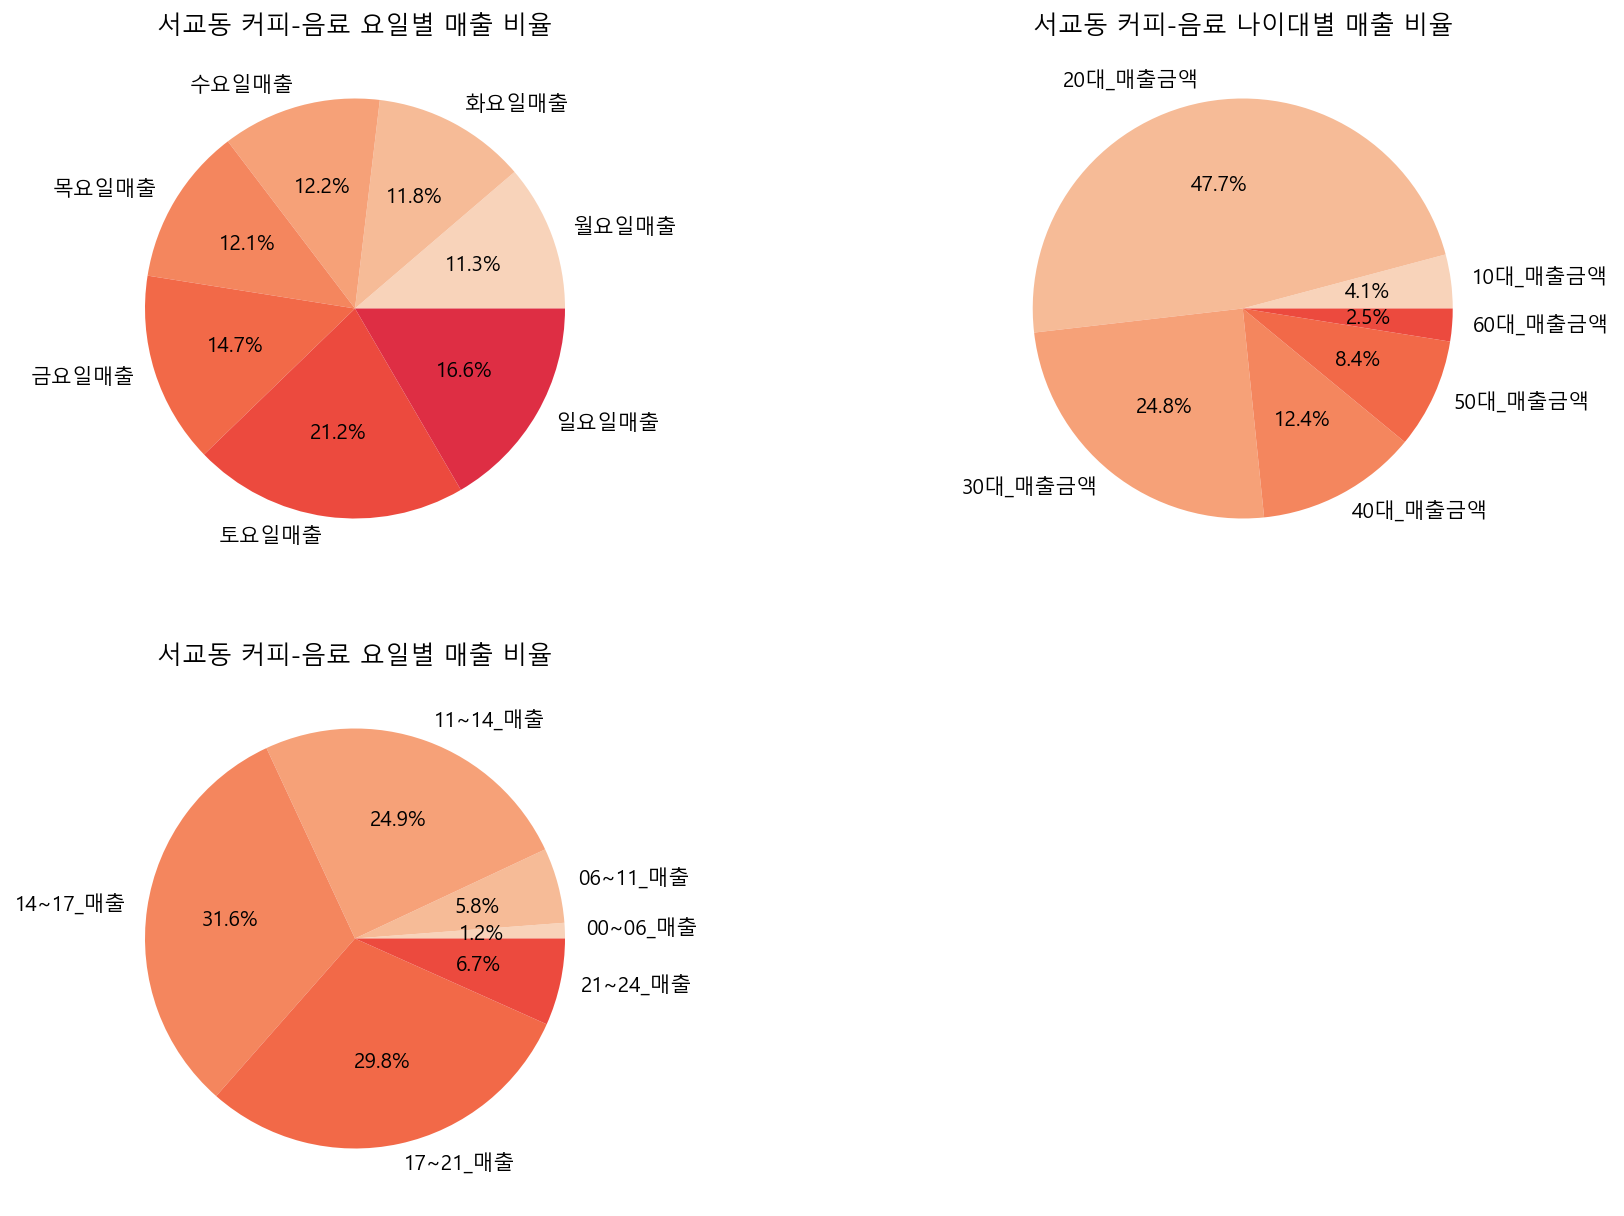

In [157]:
# 위와 같은 그래프지만 다른 원하는 지역을 볼 수 있음.
# 요일별 매출 비율: 특정 행정동과 업종에서 매출이 요일별로 어떻게 분포되어 있는지, 어느 요일에 매출이 높은지 확인할 수 있음.
# 나이대별 매출 비율: 주요 고객층이 어떤 나이대인지 파악할 수 있어 마케팅 및 상품 기획에 활용할 수 있음.
import matplotlib.pyplot as plt
import seaborn as sns

# 사용자 입력
dong_name = input("행정동명을 입력하세요: ")
sale_name = input("업종명을 입력하세요: ")

# 데이터 필터링
filtered_data = total[(total['행정동명'] == dong_name) & 
                         (total['업종명'] == sale_name)]

# 요일별, 나이대별 매출 데이터 합계 계산
week_sales_columns = ['월요일매출', '화요일매출', '수요일매출', '목요일매출', '금요일매출', '토요일매출', '일요일매출']
age_sales_columns = ['10대_매출금액', '20대_매출금액', '30대_매출금액', '40대_매출금액', '50대_매출금액', '60대_매출금액']
time_sales_columns =  ["00~06_매출", "06~11_매출", "11~14_매출", "14~17_매출", "17~21_매출", "21~24_매출"]


total_age_sales = filtered_data[age_sales_columns].sum()
weekday_sales = filtered_data[week_sales_columns].sum()
total_time_sales = filtered_data[time_sales_columns].sum()

# 요일과 나이대 시간 매출 데이터
day_labels = week_sales_columns
day_sizes = weekday_sales.values

age_labels = age_sales_columns
age_sizes = total_age_sales.values

time_labels = time_sales_columns
time_sizes = total_time_sales.values

# 파이 그래프 생성
plt.figure(figsize=(14, 10))

# 요일별 매출 그래프
plt.subplot(221)
plt.pie(day_sizes, labels=day_labels, autopct='%1.1f%%', colors=colors)
plt.title(f'{dong_name} {sale_name} 요일별 매출 비율')

# 나이대별 매출 그래프
plt.subplot(222)
plt.pie(age_sizes, labels=age_labels, autopct='%1.1f%%', colors=colors)
plt.title(f'{dong_name} {sale_name} 나이대별 매출 비율')

plt.subplot(223)
plt.pie(time_sizes, labels=time_labels, autopct='%1.1f%%', colors=colors)
plt.title(f'{dong_name} {sale_name} 요일별 매출 비율')


plt.show()
